# 1. Veri Seti Hakkında

Bu veri seti Almanya'nın en büyük 12 şirketinin 2017 ile 2024 yılları arasındaki finansal performans verilerini içermektedir. Veri seti toplamda 384 gözlem ve 11 sütun içermekte olup, her satır belirli bir şirketin belirli bir çeyrek veya yıl sonu dönemindeki finansal tablolarını temsil etmektedir.

**Veri setinde yer alan şirketler şunlardır:**

- **Otomotiv Sektörü:** Volkswagen AG, BMW AG, Daimler AG, Porsche AG
- **Teknoloji ve Yazılım:** Siemens AG, SAP SE
- **Kimya ve İlaç:** BASF SE, Bayer AG, Merck KGaA
- **Finans:** Allianz SE, Deutsche Bank AG
- **Telekomünikasyon:** Deutsche Telekom AG

**Veri setindeki 11 sütunun anlamları aşağıdaki gibidir:**

<table style='text-align: left; margin-left: 0;'>
  <tr>
    <th>Sütun Adı</th>
    <th>Açıklama</th>
  </tr>
  <tr>
    <td><strong>Company</strong></td>
    <td>Şirketin adı</td>
  </tr>
  <tr>
    <td><strong>Period</strong></td>
    <td>Finansal raporun ait olduğu dönem</td>
  </tr>
  <tr>
    <td><strong>Revenue</strong></td>
    <td>Şirketin dönem içinde elde ettiği toplam gelir (Euro)</td>
  </tr>
  <tr>
    <td><strong>Net Income</strong></td>
    <td>Şirketin vergi ve tüm giderler sonrası net kârı (Euro)</td>
  </tr>
  <tr>
    <td><strong>Liabilities</strong></td>
    <td>Şirketin toplam borç ve yükümlülükleri (Euro)</td>
  </tr>
  <tr>
    <td><strong>Assets</strong></td>
    <td>Şirketin sahip olduğu toplam varlıklar (Euro)</td>
  </tr>
  <tr>
    <td><strong>Equity</strong></td>
    <td>Şirketin özsermayesi (Euro)</td>
  </tr>
  <tr>
    <td><strong>Roa (%)</strong></td>
    <td>Aktif kârlılığı</td>
  </tr>
  <tr>
    <td><strong>Roe (%)</strong></td>
    <td>Özsermaye kârlılığı</td>
  </tr>
  <tr>
    <td><strong>Debt to Equity</strong></td>
    <td>Borç özsermaye oranı</td>
  </tr>
  <tr>
    <td><strong>Percentage Debt to Equity</strong></td>
    <td>Borç özsermaye oranının yüzde olarak ifadesi</td>
  </tr>
</table>

# 2. Kütüphaneleri İçe Aktarma

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.set_option('display.max_columns', None)  
plt.rcParams['figure.figsize'] = (10, 6)  
plt.style.use('ggplot')  
warnings.filterwarnings('ignore')

# 3. Veri Setini Yükleme

In [3]:
df = pd.read_csv('../data/top_12_german_companies_raw.csv')

df

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"
...,...,...,...,...,...,...,...,...,...,...,...
379,SAP SE,9/30/2024,10824151396,8.302800e+08,42369695133,72342104340,29972409208,114.771.336,2.770.147.673,1.413.623.271,"0,00%"
380,Bayer AG,9/30/2024,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749.565.031,3.928.964.508,1.245.680.749,"0,00%"
381,Deutsche Bank AG,9/30/2024,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603.732.773,1.522.111.161,3.223.707.074,"472,16%"
382,Porsche AG,9/30/2024,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468.014.459,2.562.407.917,745.492.288,"343,72%"


In [4]:
df_copy = df.copy()

# 4. Veri Setine Genel Bakış

In [5]:
df.sample()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
133,Siemens AG,3/31/2020,15947068708,835207323.0,19623471264,54178518349,34555047086,1.541.583.913,241.703.425,567.890.161,"425,62%"


In [6]:
df.head()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"


In [7]:
df.tail()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
379,SAP SE,9/30/2024,10824151396,8.302800e+08,42369695133,72342104340,29972409208,114.771.336,2.770.147.673,1.413.623.271,"0,00%"
380,Bayer AG,9/30/2024,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749.565.031,3.928.964.508,1.245.680.749,"0,00%"
381,Deutsche Bank AG,9/30/2024,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603.732.773,1.522.111.161,3.223.707.074,"472,16%"
382,Porsche AG,9/30/2024,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468.014.459,2.562.407.917,745.492.288,"343,72%"
383,Merck KGaA,9/30/2024,15036344926,1.704098e+09,30603212259,59444780752,28841568494,2.866.690.036,5.908.477.575,1.061.080.026,"556,84%"


In [8]:
df.columns

Index(['Company', 'Period', 'Revenue', 'Net Income', 'Liabilities', 'Assets',
       'Equity', 'ROA (%)', 'ROE (%)', 'Debt to Equity',
       'percentage  Debt to Equity'],
      dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     384 non-null    object 
 1   Period                      384 non-null    object 
 2   Revenue                     384 non-null    int64  
 3   Net Income                  384 non-null    float64
 4   Liabilities                 384 non-null    int64  
 5   Assets                      384 non-null    int64  
 6   Equity                      384 non-null    int64  
 7   ROA (%)                     384 non-null    object 
 8   ROE (%)                     384 non-null    object 
 9   Debt to Equity              384 non-null    object 
 10  percentage  Debt to Equity  384 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 33.1+ KB


In [11]:
df.describe()

,Revenue,Net Income,Liabilities,Assets,Equity
count,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,1.270992e+10,1.249025e+09,3.115579e+10,6.141624e+10,3.026045e+10
std,4.095183e+09,5.445441e+08,1.139538e+10,1.698922e+10,1.172803e+10
min,5.149850e+09,2.980309e+08,1.004637e+10,2.177324e+10,1.001762e+10
25%,9.315161e+09,8.643813e+08,2.085174e+10,5.074013e+10,1.966813e+10
50%,1.266963e+10,1.145476e+09,3.230659e+10,6.020715e+10,2.999063e+10
75%,1.621724e+10,1.560234e+09,4.088942e+10,7.369075e+10,3.984646e+10
max,1.990964e+10,2.884007e+09,4.976940e+10,9.657402e+10,4.991812e+10


<div style='background-color: #ffebee; border-left: 5px solid #f44336; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #c62828;'>🧾 Bulgular</h3>
  <ul>
    <li>Veri setinde sütun isimlerinde analiz sürecinde tutarsızlığa yol açabilecek standart dışı adlandırmalar bulunmaktadır.</li>
    <li>Bazı sütunların veri tiplerinin uygun formatta olmadığı belirlenmiştir.</li>
    <li>Bazı sütun değerlerinde ölçek hatası tespit edilmiştir.</li>
  </ul>
</div>

<div style='background-color: #e3f2fd; border-left: 5px solid #2196F3; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #1565c0;'>🎯 Karar</h3>
  <ul>
    <li>Bu sorunları gidermek amacıyla öncelikle veri setindeki sütun isimleri standartlaştırılacak, ardından sütun bazlı analiz yapılarak tespit edilen diğer problemler ele alınacak ve keşifsel veri analizi gerçekleştirilecektir.</li>
  </ul>
</div>

# 5. Veri Temizleme ve Ön İşleme

In [12]:
df.columns = ['company', 'period', 'revenue', 'net_income', 'liabilities', 'assets', 'equity', 'roa', 'roe', 'debt_to_equity', 'percentage_debt_to_equity']

df.columns

Index(['company', 'period', 'revenue', 'net_income', 'liabilities', 'assets',
       'equity', 'roa', 'roe', 'debt_to_equity', 'percentage_debt_to_equity'],
      dtype='object')

<div style='background-color: #e8f5e9; border-left: 5px solid #4CAF50; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #2e7d32;'>✅ Yapılan İşlem</h3>
  <ul>
    <li>Sütun isimleri okunabilirliği artırmak ve analiz sürecinde tutarlılık sağlamak amacıyla standart bir formata normalize edilmiştir.</li>
  </ul>
</div>

## 5.1 Company

In [13]:
df[['company']].sample(5)

,company
267,BMW AG
120,Volkswagen AG
117,Deutsche Bank AG
204,Volkswagen AG
66,Daimler AG


In [14]:
df.company.dtype

dtype('O')

In [15]:
df.company.unique()

array(['Volkswagen AG', 'Siemens AG', 'Allianz SE', 'BMW AG', 'BASF SE',
       'Deutsche Telekom AG', 'Daimler AG', 'SAP SE', 'Bayer AG',
       'Deutsche Bank AG', 'Porsche AG', 'Merck KGaA'], dtype=object)

In [16]:
df.company.nunique()

12

In [17]:
df.company.value_counts()

company
Volkswagen AG          32
Siemens AG             32
Allianz SE             32
BMW AG                 32
BASF SE                32
Deutsche Telekom AG    32
Daimler AG             32
SAP SE                 32
Bayer AG               32
Deutsche Bank AG       32
Porsche AG             32
Merck KGaA             32
Name: count, dtype: int64

In [18]:
df.isna().sum()

company                      0
period                       0
revenue                      0
net_income                   0
liabilities                  0
assets                       0
equity                       0
roa                          0
roe                          0
debt_to_equity               0
percentage_debt_to_equity    0
dtype: int64

## 5.2 Period

In [19]:
df[['period']].sample(5)

,period
294,9/30/2017
334,9/30/2020
179,3/31/2023
85,12/31/2024
40,12/31/2020


In [20]:
df.period.dtype

dtype('O')

In [21]:
df.period.unique()

array(['12/31/2017', '12/31/2018', '12/31/2019', '12/31/2020',
       '12/31/2021', '12/31/2022', '12/31/2023', '12/31/2024',
       '3/31/2017', '3/31/2018', '3/31/2019', '3/31/2020', '3/31/2021',
       '3/31/2022', '3/31/2023', '3/31/2024', '6/30/2017', '6/30/2018',
       '6/30/2019', '6/30/2020', '6/30/2021', '6/30/2022', '6/30/2023',
       '6/30/2024', '9/30/2017', '9/30/2018', '9/30/2019', '9/30/2020',
       '9/30/2021', '9/30/2022', '9/30/2023', '9/30/2024'], dtype=object)

In [22]:
df.period.nunique()

32

In [23]:
df.period.value_counts()

period
12/31/2017    12
12/31/2018    12
9/30/2023     12
9/30/2022     12
9/30/2021     12
9/30/2020     12
9/30/2019     12
9/30/2018     12
9/30/2017     12
6/30/2024     12
6/30/2023     12
6/30/2022     12
6/30/2021     12
6/30/2020     12
6/30/2019     12
6/30/2018     12
6/30/2017     12
3/31/2024     12
3/31/2023     12
3/31/2022     12
3/31/2021     12
3/31/2020     12
3/31/2019     12
3/31/2018     12
3/31/2017     12
12/31/2024    12
12/31/2023    12
12/31/2022    12
12/31/2021    12
12/31/2020    12
12/31/2019    12
9/30/2024     12
Name: count, dtype: int64

In [24]:
df.period = pd.to_datetime(df.period, errors='coerce')

df.period

0     2017-12-31
1     2017-12-31
2     2017-12-31
3     2017-12-31
4     2017-12-31
         ...    
379   2024-09-30
380   2024-09-30
381   2024-09-30
382   2024-09-30
383   2024-09-30
Name: period, Length: 384, dtype: datetime64[ns]

In [25]:
df.period.isna().sum()

np.int64(0)

<div style='background-color: #e8f5e9; border-left: 5px solid #4CAF50; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #2e7d32;'>✅ Yapılan İşlem</h3>
  <ul>
    <li>Sütun zaman bazlı analizlerin sağlıklı şekilde yapılabilmesi için datetime veri tipine dönüştürülmüştür.</li>
  </ul>
</div>

## 5.3 Revenue

In [26]:
df[['revenue']].sample(5)

,revenue
63,7382434260
61,16861000234
371,9297896247
316,7430177132
326,18005946710


In [27]:
df.revenue.dtype

dtype('int64')

In [28]:
df.revenue.isnull().sum()

np.int64(0)

In [29]:
df[df.revenue < 0]  # Revenue negatif olamaz.

,company,period,revenue,net_income,liabilities,assets,equity,roa,roe,debt_to_equity,percentage_debt_to_equity


## 5.4 Net Income

In [30]:
df[['net_income']].sample(5)

,net_income
85,5.300133e+08
338,9.128225e+08
375,2.639442e+09
268,1.295428e+09
108,1.291419e+09


In [31]:
df.net_income.dtype

dtype('float64')

In [32]:
df.net_income.isna().sum()

np.int64(0)

## 5.5 Liabilities

In [33]:
df[['liabilities']].sample(5)

,liabilities
1,45009303223
300,14924498356
268,11911955269
317,27344331892
147,36333752143


In [34]:
df.liabilities.dtype

dtype('int64')

In [35]:
df.liabilities.isna().sum()

np.int64(0)

In [36]:
df[df.liabilities < 0]  # Borç negatif olamaz.

,company,period,revenue,net_income,liabilities,assets,equity,roa,roe,debt_to_equity,percentage_debt_to_equity


## 5.6 Assets

In [37]:
df[['assets']].sample(5)

,assets
24,93429721556
269,68448568389
286,52217608876
72,78417189252
291,87097998229


In [38]:
df.assets.dtype

dtype('int64')

In [39]:
df.assets.isnull().sum()

np.int64(0)

In [40]:
df[(df.assets <= 0)]  # Toplam varliklar 0'dan büyük olmalidir.

,company,period,revenue,net_income,liabilities,assets,equity,roa,roe,debt_to_equity,percentage_debt_to_equity


## 5.7 Equity

In [41]:
df[['equity']].sample(5)

,equity
108,11204836955
375,35755880815
63,10560668658
41,48972751675
159,24602569617


In [42]:
df.equity.dtype

dtype('int64')

In [43]:
df.equity.isna().sum()

np.int64(0)

In [44]:
df[df.equity <= 0]  # Roe değerini sağlıklı hesaplayabilmek için equity > 0 olmalıdır.

,company,period,revenue,net_income,liabilities,assets,equity,roa,roe,debt_to_equity,percentage_debt_to_equity


## 5.8 Roa

In [45]:
df[['roa']].sample(5)

,roa
50,195.855.493
16,124.252.735
123,1.177.762.059
9,1.928.898.269
98,2.229.642.809


In [46]:
df.roa = (df.net_income / df.assets) * 100

df.roa

0      0.942176
1      1.696389
2      2.299543
3      1.426140
4      2.641347
         ...   
379    1.147713
380    1.749565
381    3.603733
382    1.468014
383    2.866690
Name: roa, Length: 384, dtype: float64

<div style='background-color: #e8f5e9; border-left: 5px solid #4CAF50; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #2e7d32;'>✅ Yapılan İşlem</h3>
  <ul>
    <li>İlgili sütun, beklenen yüzde (%) değerleri içermediğinden, analiz kapsamında mevcut değişkenlerden türetilerek yeniden oluşturulmuştur.</li>
  </ul>
</div>

## 5.9 Roe

In [47]:
df[['roe']].sample(5)

,roe
289,3.992.191.823
120,4.287.788.646
363,3.998.220.124
83,1.227.305.965
295,1.340.939.753


In [48]:
df.roe = (df.net_income / df.equity) * 100

df.roe

0       1.542628
1       4.219731
2       7.603361
3       3.005707
4       4.523561
         ...    
379     2.770148
380     3.928965
381    15.221112
382     2.562408
383     5.908478
Name: roe, Length: 384, dtype: float64

<div style='background-color: #e8f5e9; border-left: 5px solid #4CAF50; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #2e7d32;'>✅ Yapılan İşlem</h3>
  <ul>
    <li>İlgili sütun, beklenen yüzde (%) değerleri içermediğinden, analiz kapsamında mevcut değişkenlerden türetilerek yeniden oluşturulmuştur.</li>
  </ul>
</div>

## 5.10 Debt to Equity

In [49]:
df[['debt_to_equity']].head()

,debt_to_equity
0,637.303.746
1,1.487.478.214
2,2.306.466.848
3,1.107.581.539
4,71.259.635


In [50]:
df.debt_to_equity = df.liabilities / df.equity

df.debt_to_equity

0      0.637304
1      1.487478
2      2.306467
3      1.107582
4      0.712596
         ...   
379    1.413623
380    1.245681
381    3.223707
382    0.745492
383    1.061080
Name: debt_to_equity, Length: 384, dtype: float64

<div style='background-color: #e8f5e9; border-left: 5px solid #4CAF50; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #2e7d32;'>✅ Yapılan İşlem</h3>
  <ul>
    <li>İlgili sütun, tespit edilen ölçek hatası nedeniyle, ilgili oran değişkeni temel finansal veriler kullanılarak yeniden türetilmiştir.</li>
  </ul>
</div>

## 5.11 Percentage Debt to Equity

In [51]:
df[['debt_to_equity']] * 100

,debt_to_equity
0,63.730375
1,148.747821
2,230.646685
3,110.758154
4,71.259635
...,...
379,141.362327
380,124.568075
381,322.370707
382,74.549229


In [52]:
df[['percentage_debt_to_equity']]

,percentage_debt_to_equity
0,"0,00%"
1,"283,68%"
2,"329,65%"
3,"0,00%"
4,"634,80%"
...,...
379,"0,00%"
380,"0,00%"
381,"472,16%"
382,"343,72%"


In [53]:
df.drop(columns='percentage_debt_to_equity', inplace=True)

df

,company,period,revenue,net_income,liabilities,assets,equity,roa,roe,debt_to_equity
0,Volkswagen AG,2017-12-31,9750496618,5.168898e+08,21354201295,54861302788,33507101493,0.942176,1.542628,0.637304
1,Siemens AG,2017-12-31,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696389,4.219731,1.487478
2,Allianz SE,2017-12-31,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299543,7.603361,2.306467
3,BMW AG,2017-12-31,18808147150,9.601843e+08,35382107627,67327482638,31945375011,1.426140,3.005707,1.107582
4,BASF SE,2017-12-31,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641347,4.523561,0.712596
...,...,...,...,...,...,...,...,...,...,...
379,SAP SE,2024-09-30,10824151396,8.302800e+08,42369695133,72342104340,29972409208,1.147713,2.770148,1.413623
380,Bayer AG,2024-09-30,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749565,3.928965,1.245681
381,Deutsche Bank AG,2024-09-30,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603733,15.221112,3.223707
382,Porsche AG,2024-09-30,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468014,2.562408,0.745492


<div style='background-color: #e8f5e9; border-left: 5px solid #4CAF50; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #2e7d32;'>✅ Yapılan İşlem</h3>
  <ul>
    <li>İlgili sütun, hesaplama tutarsızlığı tespit edildiği için veri setinden çıkarılmıştır.</li>
  </ul>
</div>

# 6. Analiz ve Görselleştirme

In [54]:
df

,company,period,revenue,net_income,liabilities,assets,equity,roa,roe,debt_to_equity
0,Volkswagen AG,2017-12-31,9750496618,5.168898e+08,21354201295,54861302788,33507101493,0.942176,1.542628,0.637304
1,Siemens AG,2017-12-31,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696389,4.219731,1.487478
2,Allianz SE,2017-12-31,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299543,7.603361,2.306467
3,BMW AG,2017-12-31,18808147150,9.601843e+08,35382107627,67327482638,31945375011,1.426140,3.005707,1.107582
4,BASF SE,2017-12-31,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641347,4.523561,0.712596
...,...,...,...,...,...,...,...,...,...,...
379,SAP SE,2024-09-30,10824151396,8.302800e+08,42369695133,72342104340,29972409208,1.147713,2.770148,1.413623
380,Bayer AG,2024-09-30,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749565,3.928965,1.245681
381,Deutsche Bank AG,2024-09-30,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603733,15.221112,3.223707
382,Porsche AG,2024-09-30,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468014,2.562408,0.745492


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         384 non-null    object        
 1   period          384 non-null    datetime64[ns]
 2   revenue         384 non-null    int64         
 3   net_income      384 non-null    float64       
 4   liabilities     384 non-null    int64         
 5   assets          384 non-null    int64         
 6   equity          384 non-null    int64         
 7   roa             384 non-null    float64       
 8   roe             384 non-null    float64       
 9   debt_to_equity  384 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 30.1+ KB


In [56]:
df[['revenue', 'net_income', 'liabilities', 'assets', 'equity', 'roa', 'roe', 'debt_to_equity']].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,384.0,1.270992e+10,4.095183e+09,5.149850e+09,9.315161e+09,1.266963e+10,1.621724e+10,1.990964e+10
net_income,384.0,1.249025e+09,5.445441e+08,2.980309e+08,8.643813e+08,1.145476e+09,1.560234e+09,2.884007e+09
liabilities,384.0,3.115579e+10,1.139538e+10,1.004637e+10,2.085174e+10,3.230659e+10,4.088942e+10,4.976940e+10
assets,384.0,6.141624e+10,1.698922e+10,2.177324e+10,5.074013e+10,6.020715e+10,7.369075e+10,9.657402e+10
equity,384.0,3.026045e+10,1.172803e+10,1.001762e+10,1.966813e+10,2.999063e+10,3.984646e+10,4.991812e+10
roa,384.0,2.260345e+00,1.406047e+00,5.011021e-01,1.310458e+00,1.902219e+00,2.850194e+00,9.156052e+00
roe,384.0,4.992758e+00,3.401370e+00,9.804799e-01,2.596827e+00,4.004204e+00,6.273825e+00,2.111917e+01
debt_to_equity,384.0,1.235580e+00,7.815920e-01,2.196627e-01,7.320947e-01,1.034642e+00,1.512128e+00,4.631348e+00


In [57]:
df.groupby('company')[['revenue']].mean().sort_values('revenue', ascending=False)

,revenue
company,
Merck KGaA,1.342963e+10
BASF SE,1.320693e+10
Allianz SE,1.301543e+10
Daimler AG,1.298295e+10
Deutsche Telekom AG,1.294884e+10
BMW AG,1.279363e+10
Siemens AG,1.266250e+10
Deutsche Bank AG,1.255227e+10
Volkswagen AG,1.242831e+10


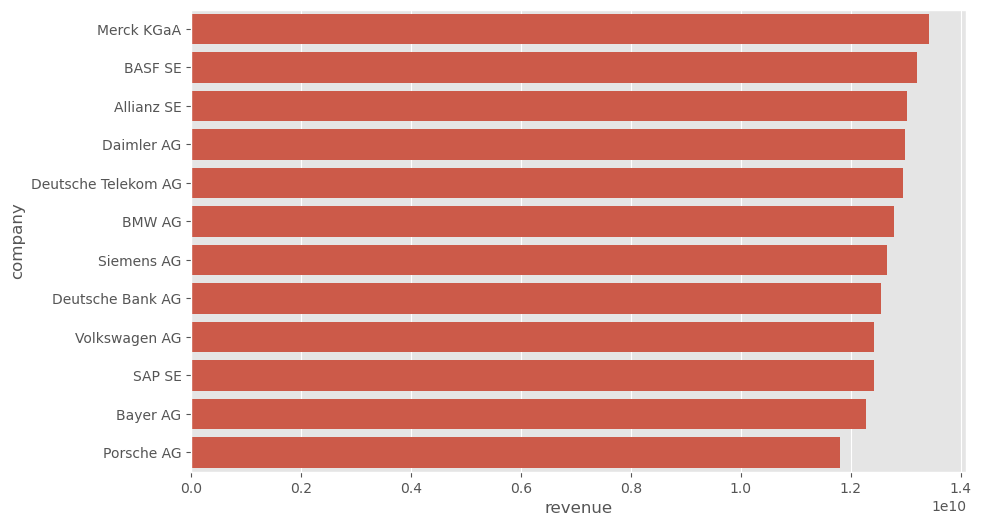

In [58]:
sns.barplot(data=df.groupby('company')['revenue'].mean().sort_values(ascending=False).reset_index(), x='revenue', y='company')

plt.show()

In [59]:
df.groupby('company')[['net_income']].mean().sort_values('net_income', ascending=False)

,net_income
company,
Merck KGaA,1.394800e+09
Volkswagen AG,1.335629e+09
BASF SE,1.322951e+09
Allianz SE,1.314984e+09
BMW AG,1.264378e+09
Daimler AG,1.262170e+09
Deutsche Bank AG,1.254326e+09
Bayer AG,1.244583e+09
Deutsche Telekom AG,1.242394e+09


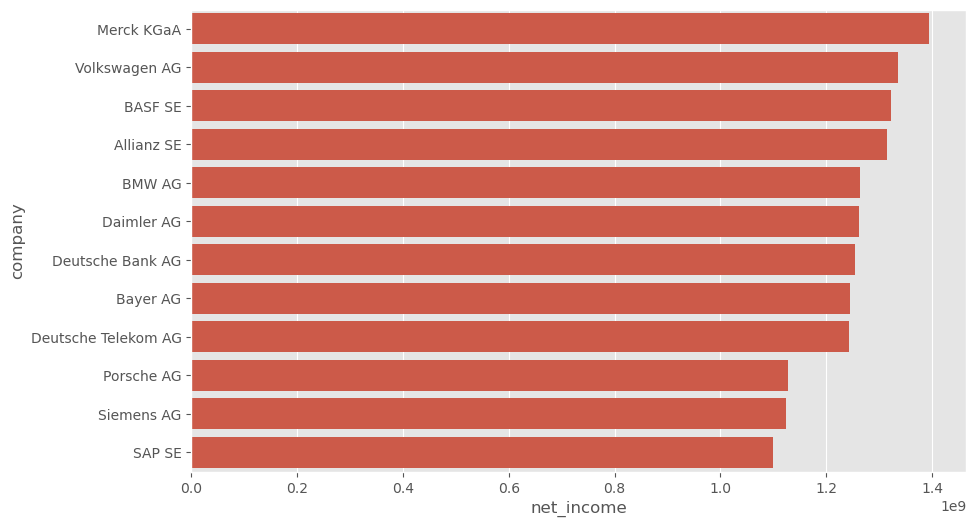

In [60]:
sns.barplot(data=df.groupby('company')['net_income'].mean().sort_values(ascending=False).reset_index(), x='net_income', y='company')

plt.show()

In [61]:
df.groupby('company')[['liabilities']].mean().sort_values('liabilities', ascending=False)

,liabilities
company,
Merck KGaA,3.421248e+10
Daimler AG,3.311068e+10
SAP SE,3.241681e+10
Bayer AG,3.220732e+10
Porsche AG,3.193370e+10
Deutsche Bank AG,3.180432e+10
BMW AG,3.164122e+10
Siemens AG,3.035153e+10
Allianz SE,2.992707e+10


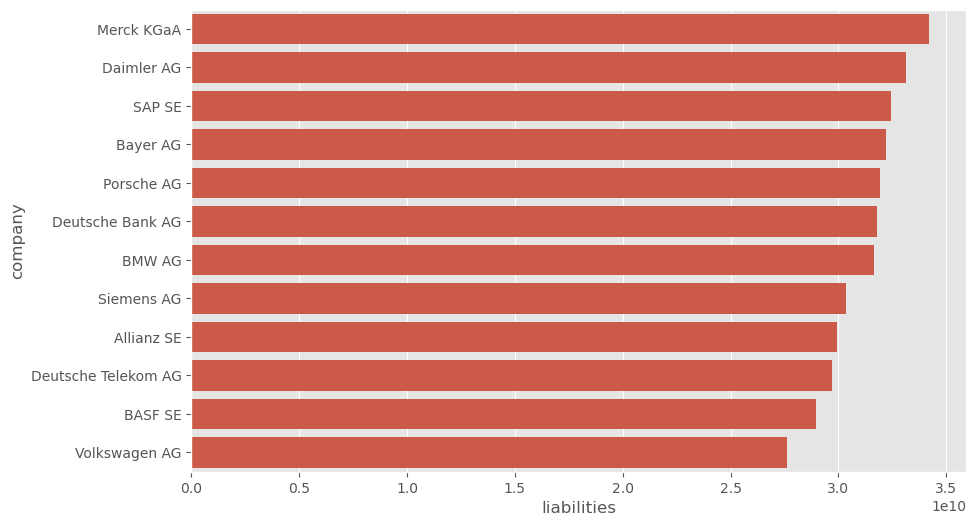

In [62]:
sns.barplot(data=df.groupby('company')['liabilities'].mean().sort_values(ascending=False).reset_index(), x='liabilities', y='company')

plt.show()

In [63]:
df.groupby('company')[['assets']].mean().sort_values('assets', ascending=False)

,assets
company,
Deutsche Bank AG,6.448487e+10
BASF SE,6.325328e+10
Deutsche Telekom AG,6.296833e+10
Porsche AG,6.290280e+10
Merck KGaA,6.261155e+10
BMW AG,6.254100e+10
SAP SE,6.149468e+10
Daimler AG,6.102514e+10
Bayer AG,6.085879e+10


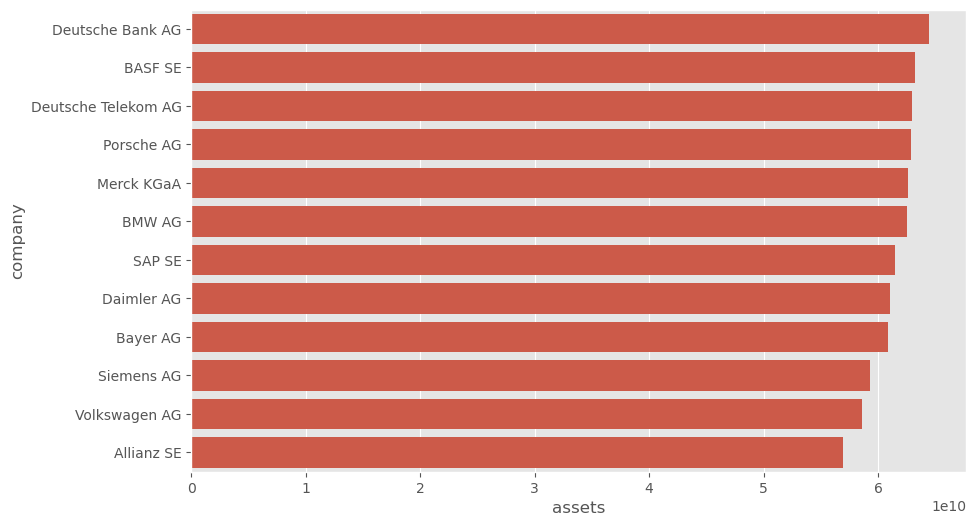

In [64]:
sns.barplot(data=df.groupby('company')['assets'].mean().sort_values(ascending=False).reset_index(), x='assets', y='company')

plt.show()

In [65]:
df.groupby('company')[['equity']].mean().sort_values('equity', ascending=False)

,equity
company,
BASF SE,3.430486e+10
Deutsche Telekom AG,3.324702e+10
Deutsche Bank AG,3.268055e+10
Volkswagen AG,3.097263e+10
Porsche AG,3.096910e+10
BMW AG,3.089978e+10
SAP SE,2.907786e+10
Siemens AG,2.896415e+10
Bayer AG,2.865147e+10


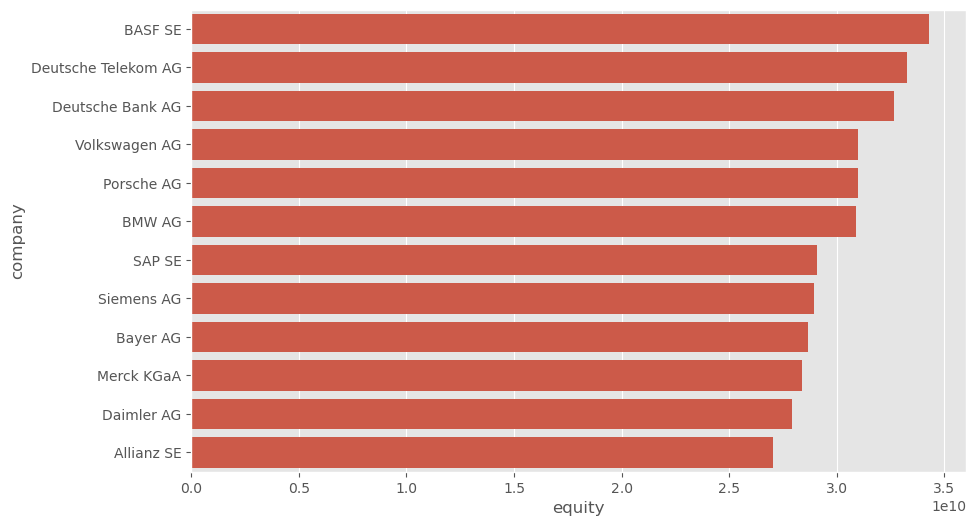

In [66]:
sns.barplot(data=df.groupby('company')['equity'].mean().sort_values(ascending=False).reset_index(), x='equity', y='company')

plt.show()

In [67]:
df.groupby('company')[['roa']].mean().sort_values('roa', ascending=False)

,roa
company,
Volkswagen AG,2.676691
Allianz SE,2.546871
Bayer AG,2.371059
Merck KGaA,2.368700
BASF SE,2.354594
BMW AG,2.229955
Daimler AG,2.205607
Deutsche Bank AG,2.104061
Deutsche Telekom AG,2.103734


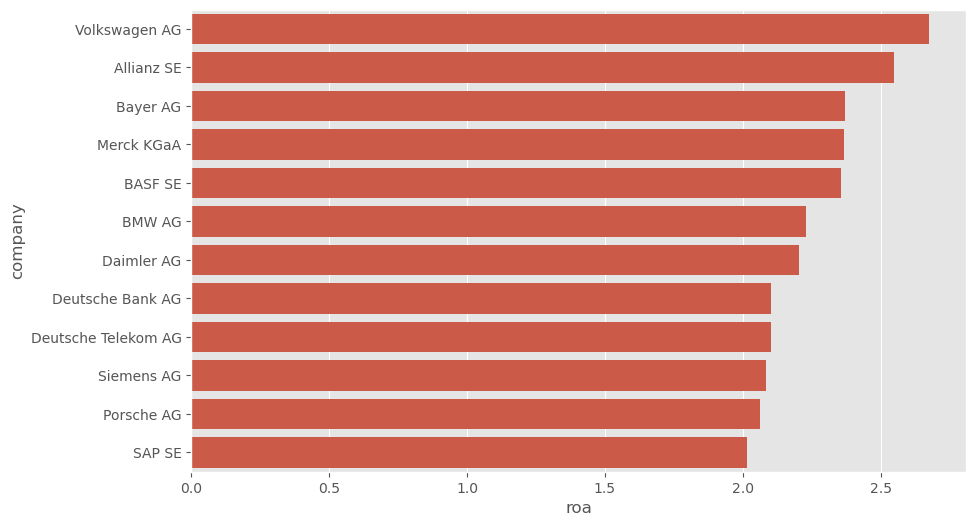

In [68]:
sns.barplot(data=df.groupby('company')['roa'].mean().sort_values(ascending=False).reset_index(), x='roa', y='company')

plt.show()

In [69]:
df.groupby('company')[['roe']].mean().sort_values('roe', ascending=False)

,roe
company,
Daimler AG,5.642682
Volkswagen AG,5.631437
Allianz SE,5.560286
Merck KGaA,5.434668
Bayer AG,5.391142
BMW AG,4.947637
SAP SE,4.815630
Siemens AG,4.725762
Deutsche Bank AG,4.559157


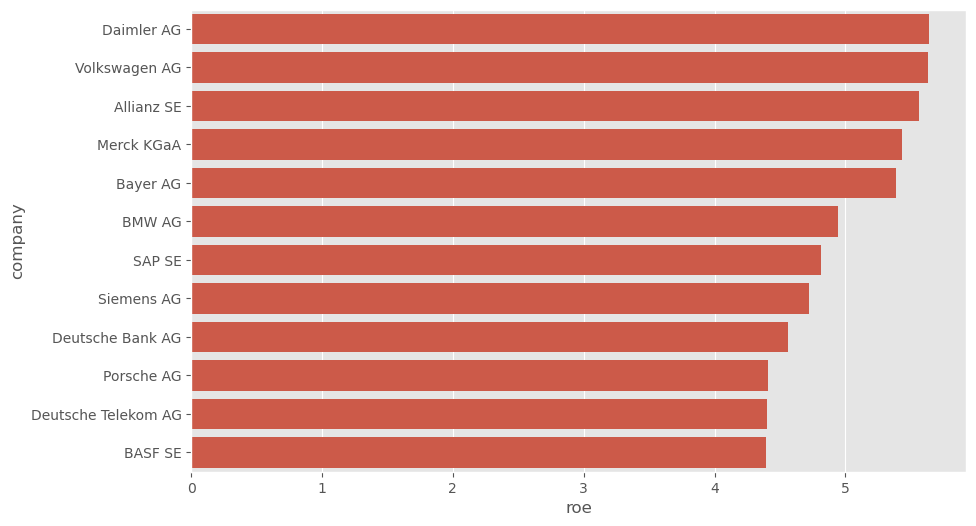

In [70]:
sns.barplot(data=df.groupby('company')['roe'].mean().sort_values(ascending=False).reset_index(), x='roe', y='company')

plt.show()

In [71]:
df.groupby('company')[['debt_to_equity']].mean().sort_values('debt_to_equity', ascending=False)

,debt_to_equity
company,
Daimler AG,1.513517
Merck KGaA,1.443471
Bayer AG,1.366722
SAP SE,1.332244
BMW AG,1.262382
Siemens AG,1.257575
Allianz SE,1.243841
Porsche AG,1.169503
Deutsche Bank AG,1.132813


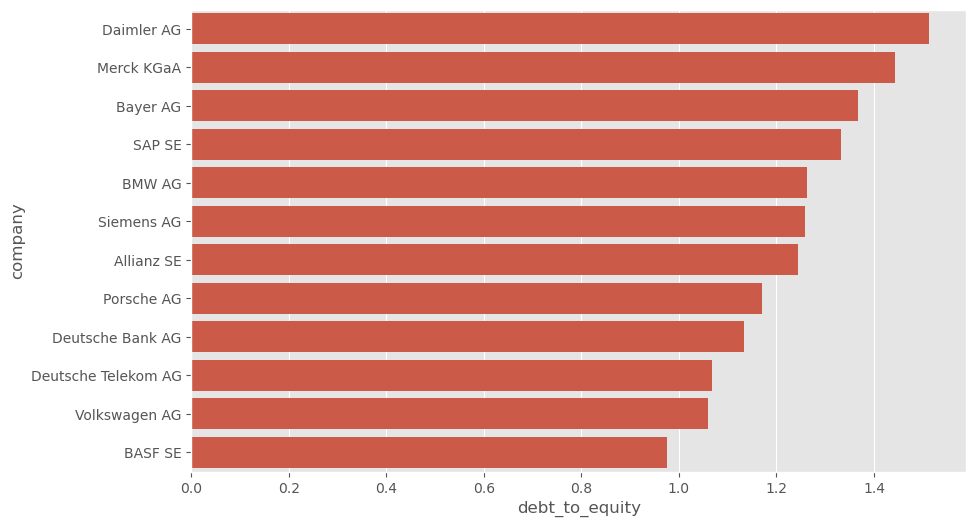

In [72]:
sns.barplot(data=df.groupby('company')['debt_to_equity'].mean().sort_values(ascending=False).reset_index(), x='debt_to_equity', y='company')

plt.show()

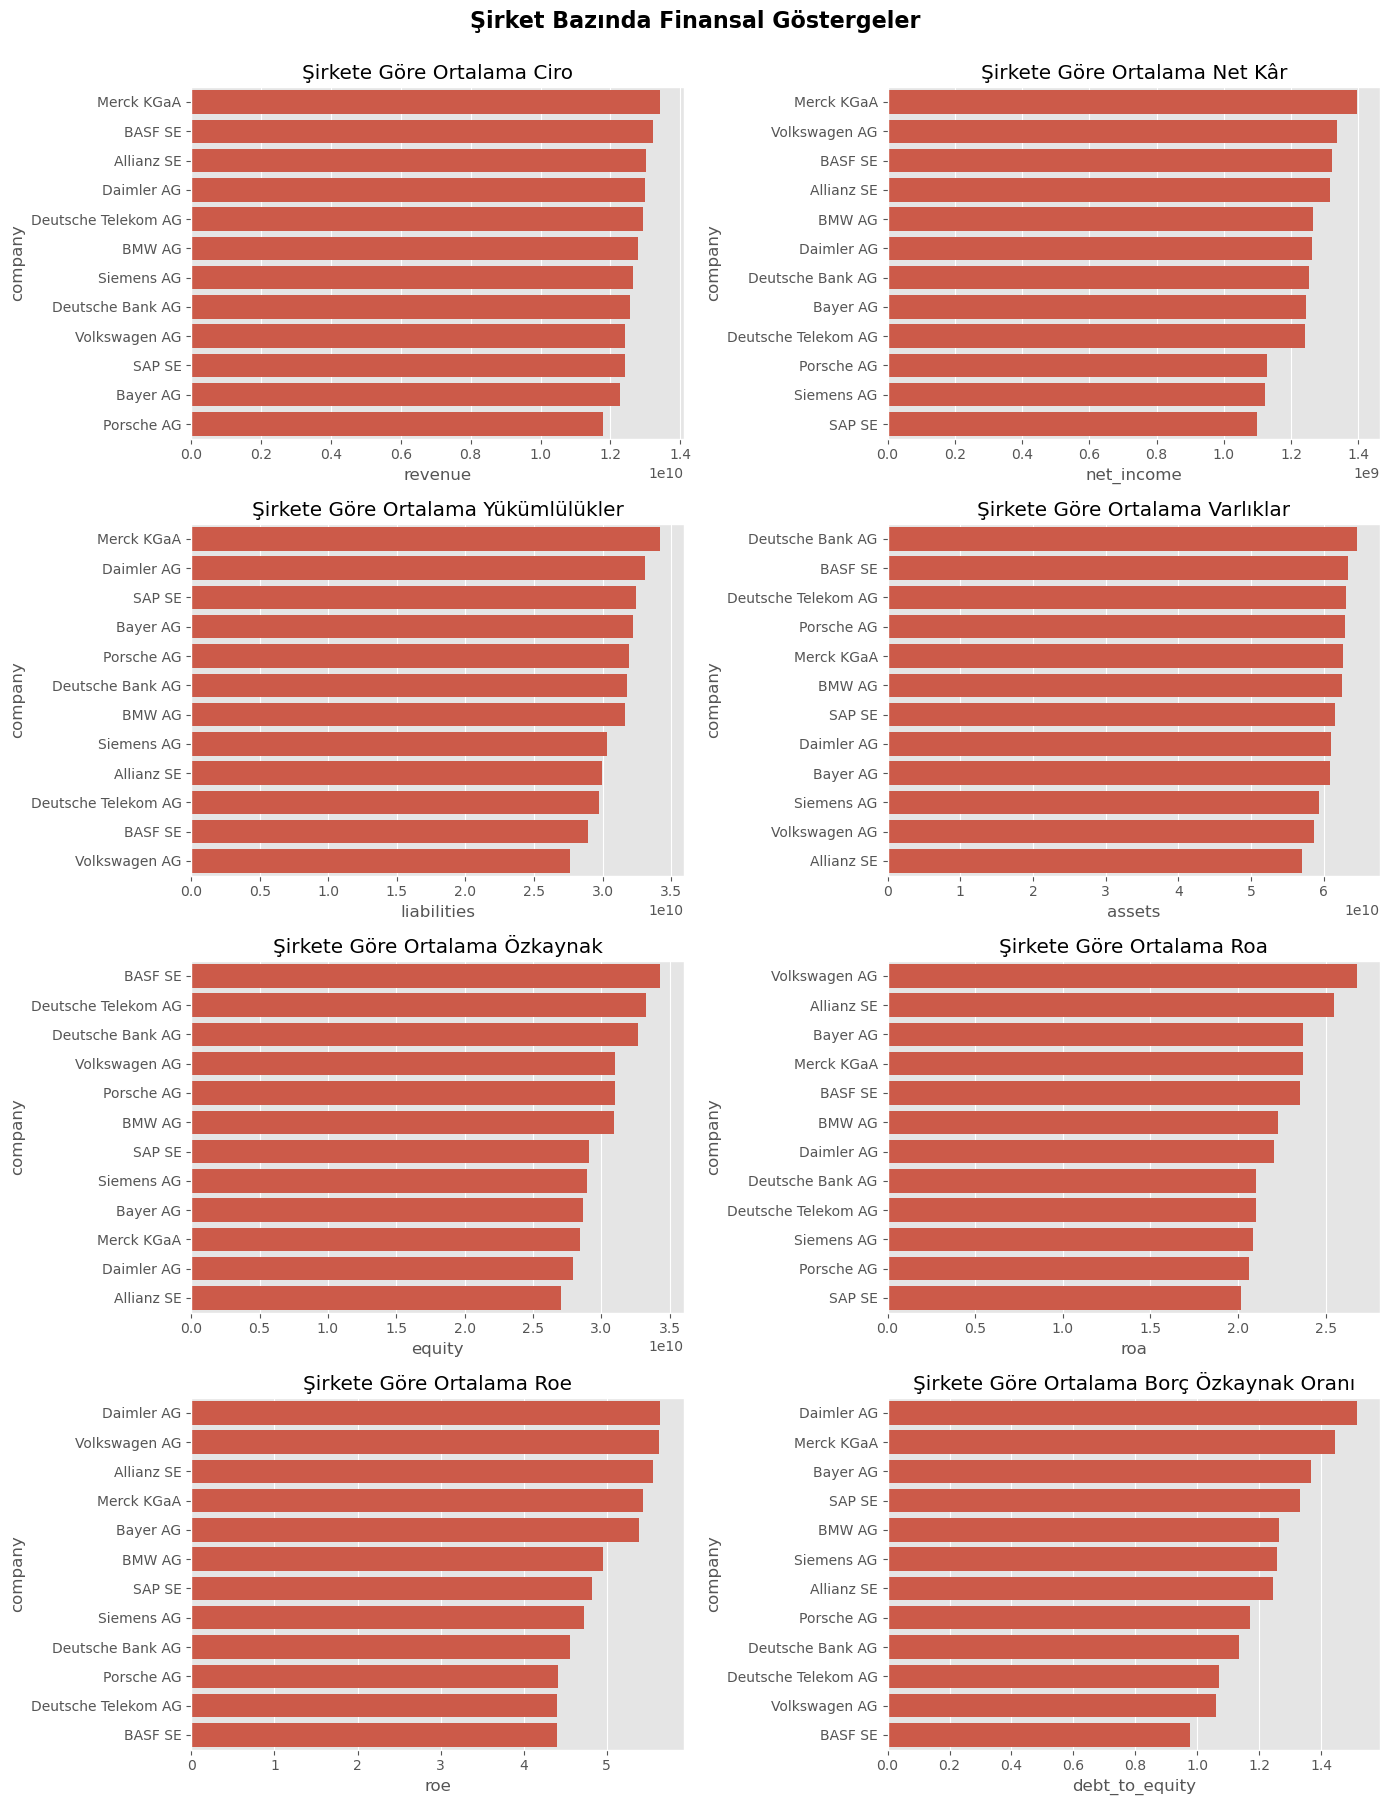

In [73]:
fig, ax = plt.subplots(4, 2, figsize=(14, 18))

sns.barplot(data=df.groupby('company')['revenue'].mean().sort_values(ascending=False).reset_index(), x='revenue', y='company', ax=ax[0, 0])

ax[0, 0].set_title('Şirkete Göre Ortalama Ciro')

sns.barplot(data=df.groupby('company')['net_income'].mean().sort_values(ascending=False).reset_index(), x='net_income', y='company', ax=ax[0, 1])

ax[0, 1].set_title('Şirkete Göre Ortalama Net Kâr')

sns.barplot(data=df.groupby('company')['liabilities'].mean().sort_values(ascending=False).reset_index(), x='liabilities', y='company', ax=ax[1, 0])

ax[1, 0].set_title('Şirkete Göre Ortalama Yükümlülükler')

sns.barplot(data=df.groupby('company')['assets'].mean().sort_values(ascending=False).reset_index(), x='assets', y='company', ax=ax[1, 1])

ax[1, 1].set_title('Şirkete Göre Ortalama Varlıklar')

sns.barplot(data=df.groupby('company')['equity'].mean().sort_values(ascending=False).reset_index(), x='equity', y='company', ax=ax[2, 0])

ax[2, 0].set_title('Şirkete Göre Ortalama Özkaynak')

sns.barplot(data=df.groupby('company')['roa'].mean().sort_values(ascending=False).reset_index(), x='roa', y='company', ax=ax[2, 1])

ax[2, 1].set_title('Şirkete Göre Ortalama Roa')

sns.barplot(data=df.groupby('company')['roe'].mean().sort_values(ascending=False).reset_index(), x='roe', y='company', ax=ax[3, 0])

ax[3, 0].set_title('Şirkete Göre Ortalama Roe')

sns.barplot(data=df.groupby('company')['debt_to_equity'].mean().sort_values(ascending=False).reset_index(), x='debt_to_equity', y='company', ax=ax[3, 1])

ax[3, 1].set_title('Şirkete Göre Ortalama Borç Özkaynak Oranı')

fig.suptitle('Şirket Bazında Finansal Göstergeler', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()

plt.show()

<div style='background-color: #e8f5e9; border-left: 5px solid #2e7d32; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #1b5e20;'>📊 Sonuç 1 – Ortalama Finansal Göstergelere Dayalı Şirket Bazlı Değerlendirme</h3>
  <ul>
    <li><strong>Merck KGaA</strong> ortalama ciro ve net kâr göstergelerinde ilk sırada yer almakta olup finansal büyüklük açısından lider konumdadır. Ancak borç özkaynak oranının da üst sıralarda olması kaldıraç etkisine işaret etmektedir.</li>
    <li><strong>BASF SE</strong> güçlü özkaynak yapısıyla dikkat çekmekte olup varlık ve ciro büyüklüğünde üst grupta yer almaktadır. Borç özkaynak oranı görece daha düşüktür; bu durum bilanço dayanıklılığı açısından olumlu görünmektedir.</li>
    <li><strong>Allianz SE</strong> ciro ve net kâr açısından üst sıralarda yer almakta olup roa performansı güçlüdür. Ancak borç oranı orta yüksek seviyededir.</li>
    <li><strong>Daimler AG</strong> ortalama roe oranında ilk sırada yer almakta olup özkaynak verimliliği açısından güçlü görünmektedir. Ancak aynı zamanda borç özkaynak oranında da lider olması, yüksek roe'nin kaldıraçla desteklenmiş olabileceğini göstermektedir.</li>
    <li><strong>Volkswagen AG</strong> roa oranında lider konumda olup varlıklarını verimli kullandığını göstermektedir. Borç oranı görece daha düşük seviyededir.</li>
    <li><strong>BMW AG</strong> roe ve net kâr göstergelerinde üst grupta yer almakta olup dengeli bir finansal yapı sergilemektedir.</li>
    <li><strong>Siemens AG</strong> ortalama değerler açısından orta üst grupta konumlanmakta olup finansal göstergelerde aşırı uç bir risk profili sergilememektedir.</li>
    <li><strong>SAP SE</strong> net kâr ve roe göstergelerinde orta sıralarda yer almakta olup borç oranı orta seviyededir.</li>
    <li><strong>Bayer AG</strong> roa performansı güçlü olmakla birlikte borç özkaynak oranının yüksek olması finansal risk açısından dikkat çekmektedir.</li>
    <li><strong>Deutsche Bank AG</strong> varlık büyüklüğünde lider konumda olmakla birlikte roa ve roe göstergelerinde üst sıralarda yer almamaktadır. Bankacılık sektörüne özgü bilanço yapısı dikkate alınmalıdır.</li>
    <li><strong>Deutsche Telekom AG</strong> varlık ve özkaynak büyüklüğünde üst sıralarda yer almakta olup roa performansı orta seviyededir.</li>
    <li><strong>Porsche AG</strong> ortalama göstergelerde alt orta grupta konumlanmakta olup aşırı kaldıraç kullanımı gözlenmemektedir.</li>
    <li><strong>Genel değerlendirme:</strong> Ortalama finansal göstergeler incelendiğinde, yüksek bilanço büyüklüğünün her zaman yüksek verimlilik anlamına gelmediği görülmektedir. Özellikle roe performansı ile borç özkaynak oranı arasındaki ilişki, bazı şirketlerde kaldıraç etkisinin belirleyici olduğunu göstermektedir.</li>
  </ul>
</div>

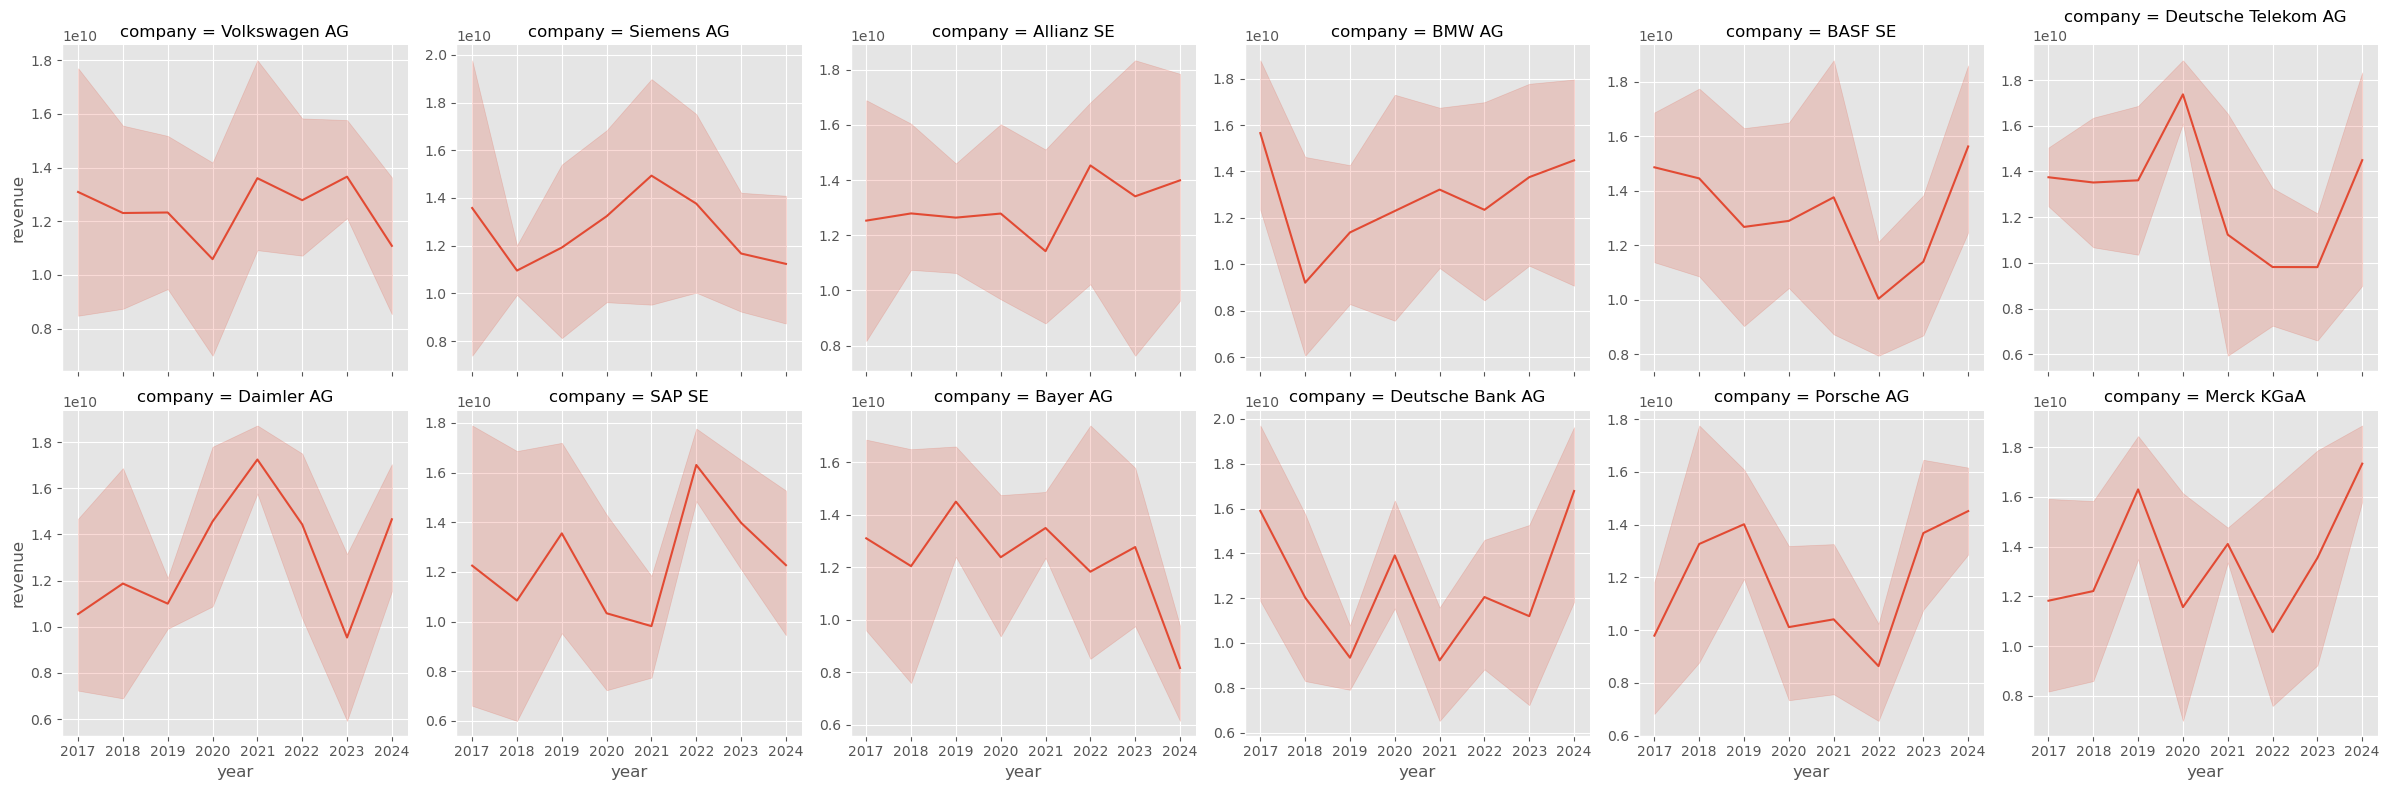

In [74]:
sns.relplot(
    data=df.assign(year=df['period'].dt.year),
    x='year',
    y='revenue',
    col='company',
    col_wrap=6,
    kind='line',
    height=4,
    facet_kws={'sharey': False}
           )

plt.tight_layout()

plt.show()

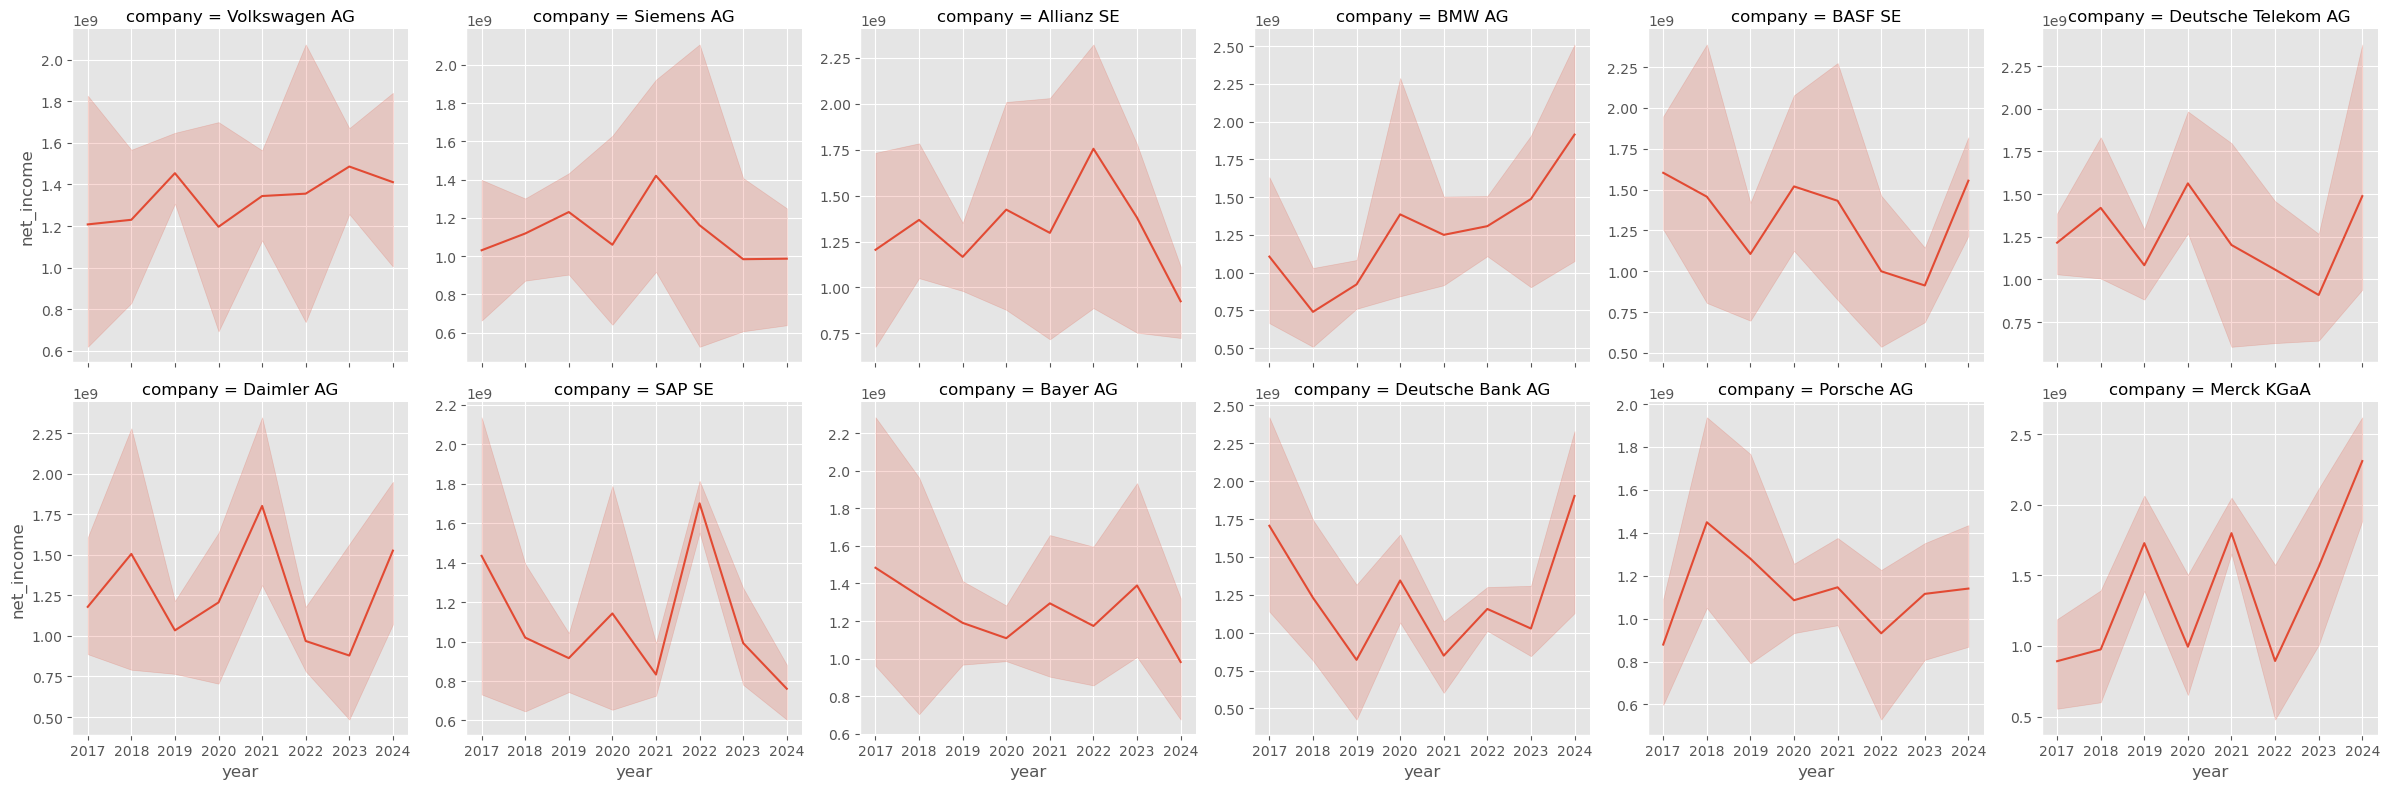

In [75]:
sns.relplot(
    data=df.assign(year=df['period'].dt.year),
    x='year',
    y='net_income',
    col='company',
    col_wrap=6,
    kind='line',
    height=4,
    facet_kws={'sharey': False}
           )

plt.tight_layout()

plt.show()

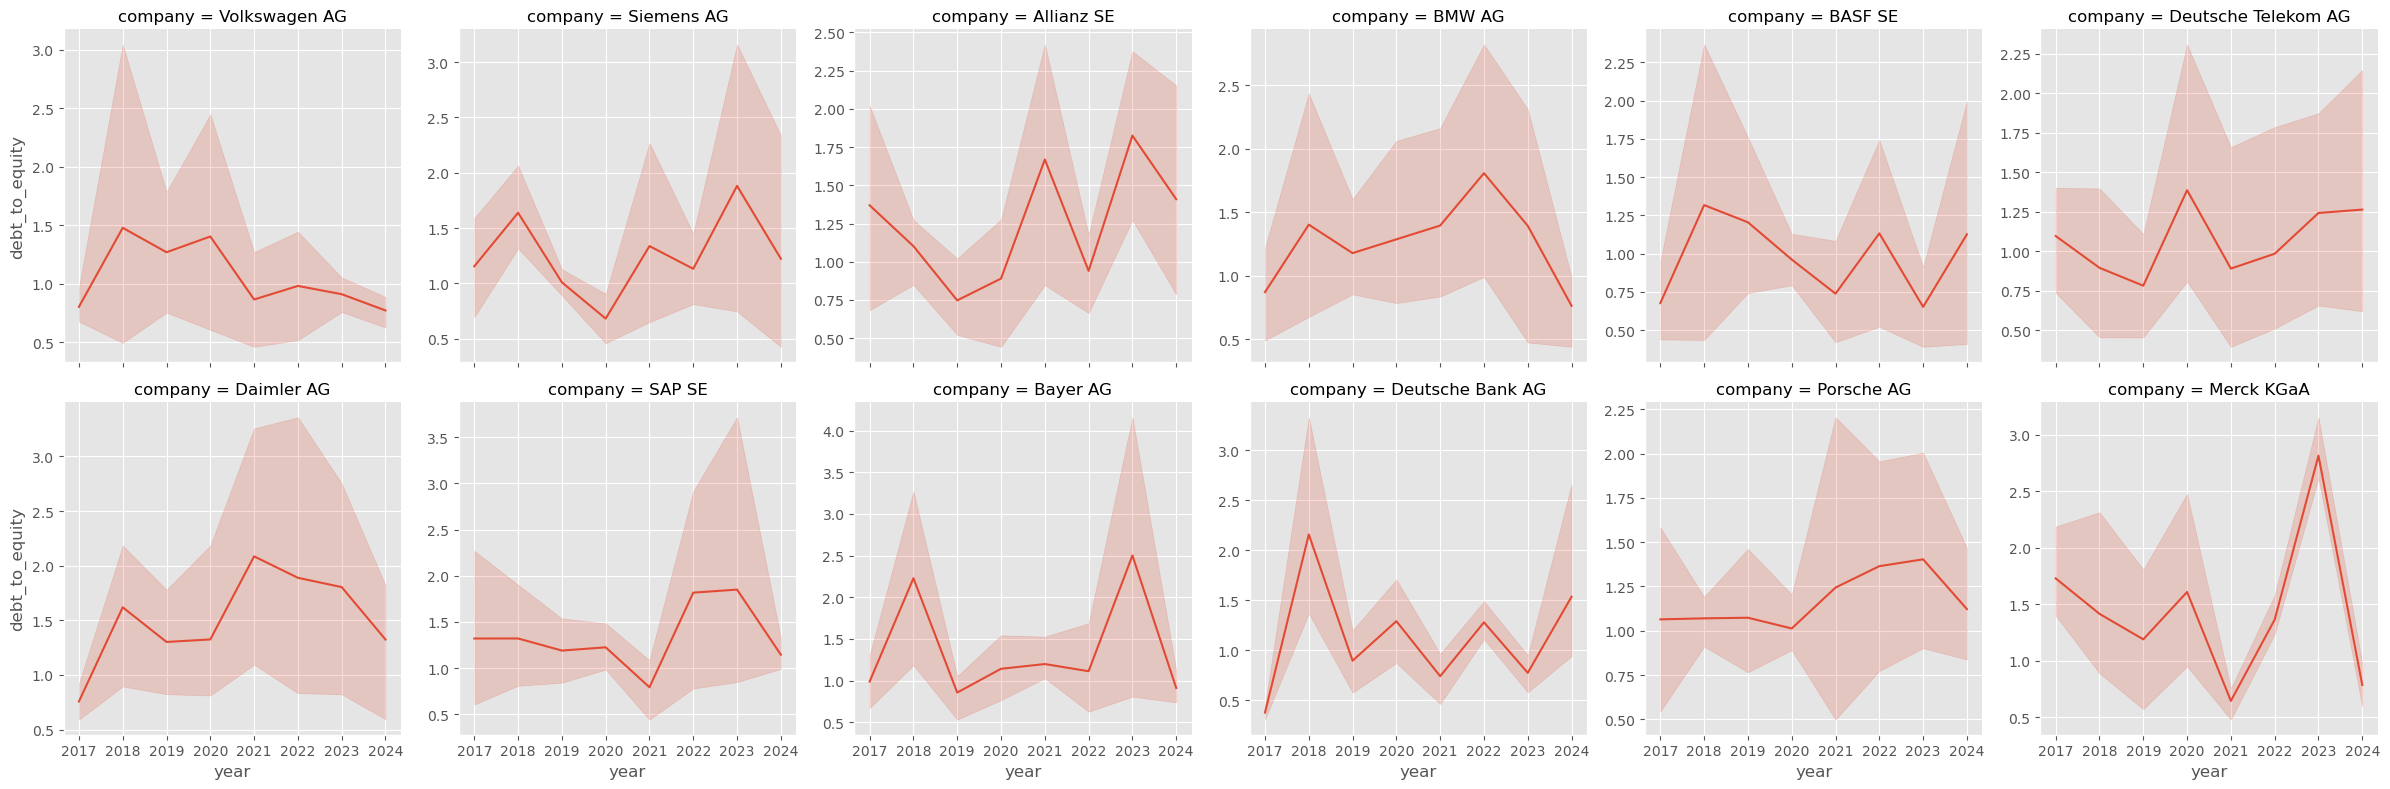

In [76]:
sns.relplot(
    data=df.assign(year=df['period'].dt.year),
    x='year',
    y='debt_to_equity',
    col='company',
    col_wrap=6,
    kind='line',
    height=4,
    facet_kws={'sharey': False}
           )

plt.tight_layout()

plt.show()

<div style='background-color: #e8f5e9; border-left: 5px solid #2e7d32; padding: 15px; margin: 10px 0;'>
  <h3 style='margin-top: 0; color: #1b5e20;'>📊 Sonuç 2 – Trend Analizine Dayalı Şirket Bazlı Değerlendirme</h3>
  <ul>
    <li><strong>Volkswagen AG</strong> 2020 yılında revenue ve net income tarafında düşüş yaşamış, sonraki yıllarda toparlanma göstermiştir. Borç özkaynak oranı genel olarak düşüş eğilimindedir. Bu durum pandemi sonrası toparlanan ancak temkinli finansal yapı sergileyen bir profil göstermektedir.</li>
    <li><strong>Siemens AG</strong> revenue ve net income açısından dalgalı ancak genel olarak yatay ılımlı artış eğilimi göstermektedir. Borç oranı dönemsel sıçramalar içerse de sürdürülemez bir artış gözlenmemektedir.</li>
    <li><strong>Allianz SE</strong> revenue ve net income tarafında özellikle 2022 sonrası güçlü performans göstermiştir. Ancak debt to equity oranında belirgin volatilite mevcuttur. Bu durum performansın dönemsel riskle birlikte ilerlediğini göstermektedir.</li>
    <li><strong>BMW AG</strong> revenue ve net income tarafında istikrarlı bir yükseliş eğilimi sergilemektedir. Borç oranı kontrol altında görünmektedir. Dengeli büyüme gösteren şirketler arasında yer almaktadır.</li>
    <li><strong>BASF SE</strong> revenue ve net income tarafında dalgalı bir yapı göstermekte olup 2022 sonrası toparlanma eğilimi gözlenmektedir. Borç oranı aşırı artış göstermemektedir. Orta düzey risk profiline sahiptir.</li>
    <li><strong>Deutsche Telekom AG</strong> revenue tarafında görece stabil, net income tarafında ise dönemsel dalgalanmalar göstermektedir. Borç özkaynak oranı yükselme eğilimi göstermektedir. Bu durum finansal kaldıraç artışına işaret etmektedir.</li>
    <li><strong>Daimler AG</strong> hem net income hem de debt to equity trendinde yüksek volatilite göstermektedir. 2021–2023 döneminde borç oranındaki belirgin artış, performansın kaldıraçla desteklenmiş olabileceğini düşündürmektedir. Risk seviyesi görece yüksektir.</li>
    <li><strong>SAP SE</strong> net income tarafında 2022 yılında güçlü bir sıçrama göstermiş, ardından düşüş yaşamıştır. Borç oranı da benzer şekilde dalgalı seyretmektedir. Performans istikrarı sınırlıdır.</li>
    <li><strong>Bayer AG</strong> net income tarafında aşağı yönlü eğilim göstermekte ve borç özkaynak oranında 2023 yılında ciddi artış gözlenmektedir. Bu kombinasyon finansal risk açısından dikkat çekmektedir.</li>
    <li><strong>Deutsche Bank AG</strong> 2020 yılında dip yaptıktan sonra net income tarafında güçlü toparlanma göstermiştir. Borç oranı dalgalı seyretmekle birlikte banka sektörüne özgü yapısal yüksek kaldıraç dikkate alınmalıdır.</li>
    <li><strong>Porsche AG</strong> revenue ve net income tarafında genel olarak yükseliş eğilimi göstermektedir. Borç oranı aşırı oynak değildir. Görece dengeli bir performans yapısı sergilemektedir.</li>
    <li><strong>Merck KGaA</strong> 2022 sonrası net income ve revenue tarafında güçlü ivme göstermiştir. 2023 yılında borç oranında artış görülse de 2024'te düşüş yaşanmıştır. Performans momentum şirketi görünümündedir.</li>
    <li><strong>Genel değerlendirme:</strong> Trend analizi, şirketlerin ortalama büyüklüklerinden bağımsız olarak performans yönü ve risk dinamiklerinin farklılaştığını göstermektedir. Özellikle borç özkaynak oranındaki artışlar, yüksek kârlılık dönemlerinin sürdürülebilirliğini değerlendirmede kritik rol oynamaktadır.</li>
  </ul>
</div>